In [9]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import gamma, binom,gammaln,factorial
%matplotlib inline

$H_0: \mathsf{P} \in \mathcal{P}_0 \text{, где } \mathcal{P}_0 = \{Bin(m, p) | p \in [0,1]  \} \text{, причем плотность  Bin(m,p)} \text{ равна } \binom{m}{x} \cdot p^x \cdot (1-p)^{m - x}.$
Положим m = 20


$H_1: \mathsf{P} \in \mathcal{P}_1 \text{, где } \mathcal{P}_1 = \{Pois(\lambda) | \lambda \in (0 , \infty) \} \text{, причем плотность } Pois(\lambda) \text{ равна } \frac{e^{-\lambda} \lambda^x} {x!}.$

В качестве априорных распределения $\beta(\alpha,\beta)$ и $\Gamma(\gamma,\delta)$ соответственно. Тогда сопряженные  апостериорные распределения будут иметь вид $\beta(\alpha + \sum_{i = 1}^n x_i, \beta + n m - \sum_{i = 1}^n x_i)$ и $\Gamma(\gamma + n, \delta + \sum_{i = 1}^n x_i)$

Тогда интергрируя полученные выражения получим:

$p^0(X) = \int\limits_\Theta p^0_\theta(X) q^0(\theta) d\theta = \int\limits_0^1 \prod\limits_{i = 1}^n \binom{m}{x_i} \cdot p^{\sum{x_i}} \cdot (1- p)^{nm - \sum{x_i}} \cdot p^{\alpha - 1} \cdot (1- p)^{\beta -1} dp =  \prod\limits_{i = 1}^n \binom{m}{x_i} \cdot \frac{\Gamma(\sum\limits_{i = 1}^n{x_i} + \alpha) \cdot \Gamma(\beta + mn -\sum\limits_{i = 1}^n{x_i})}{\Gamma(\alpha + \beta + mn)} 
$


$p^1(X) = \int\limits_\Theta p^1_\theta(X) q^0(\theta) d\theta = \int\limits_0^{\infty} \frac{e^{-n \lambda} \lambda^{\sum x_i}}{\prod x_i!} \cdot \frac{\gamma^\delta \cdot \lambda^{\delta -1}}{\Gamma(\delta)} \cdot e^{-\gamma \lambda} d \lambda = \frac{\gamma^\delta }{\Gamma(\delta) \cdot \prod x_i!} \cdot \frac{\Gamma(\sum x_i + \delta )}{(\gamma + n)^{\sum x_i + \delta }}
$


Возьмём $\alpha = 2, \beta = 2, \gamma = 0.5, \delta = 2$ 

Для того, чтобы избежать переполнения, рассмотрим логарифм от критерия

In [16]:
N = [100,250, 500]
Alp = [0.01, 0.05, 0.1]

In [24]:
def criteria(X, alpha = 2, beta = 2, gam = 0.5, delta = 2, m = 20):
    n = len(X)
    sum_x = np.sum(X)
    p_0_log = np.sum([np.log(binom(m ,x)) for x in X]) + gammaln(sum_x + alpha) 
    p_0_log += gammaln(beta + m * n - sum_x)  - gammaln(alpha + beta + m * n)
    
    p_1_log = np.log(gam)*delta - gammaln(delta) - np.sum([np.log(factorial(x)) for x in X])
    p_1_log += gammaln(sum_x + delta) - np.log(gam + n) * (sum_x + delta)
    return p_0_log - p_1_log

In [34]:
def create_criteria_samples(n, size = 100, alpha = 2, beta = 2,gam = 0.5, delta = 2, m = 20):
    params = sps.beta.rvs(alpha, beta, size=size)
    samples = [sps.binom.rvs(m, param, size=n) for param in params]
    criteria_samples = [criteria(sample) for sample in samples]

    return criteria_samples

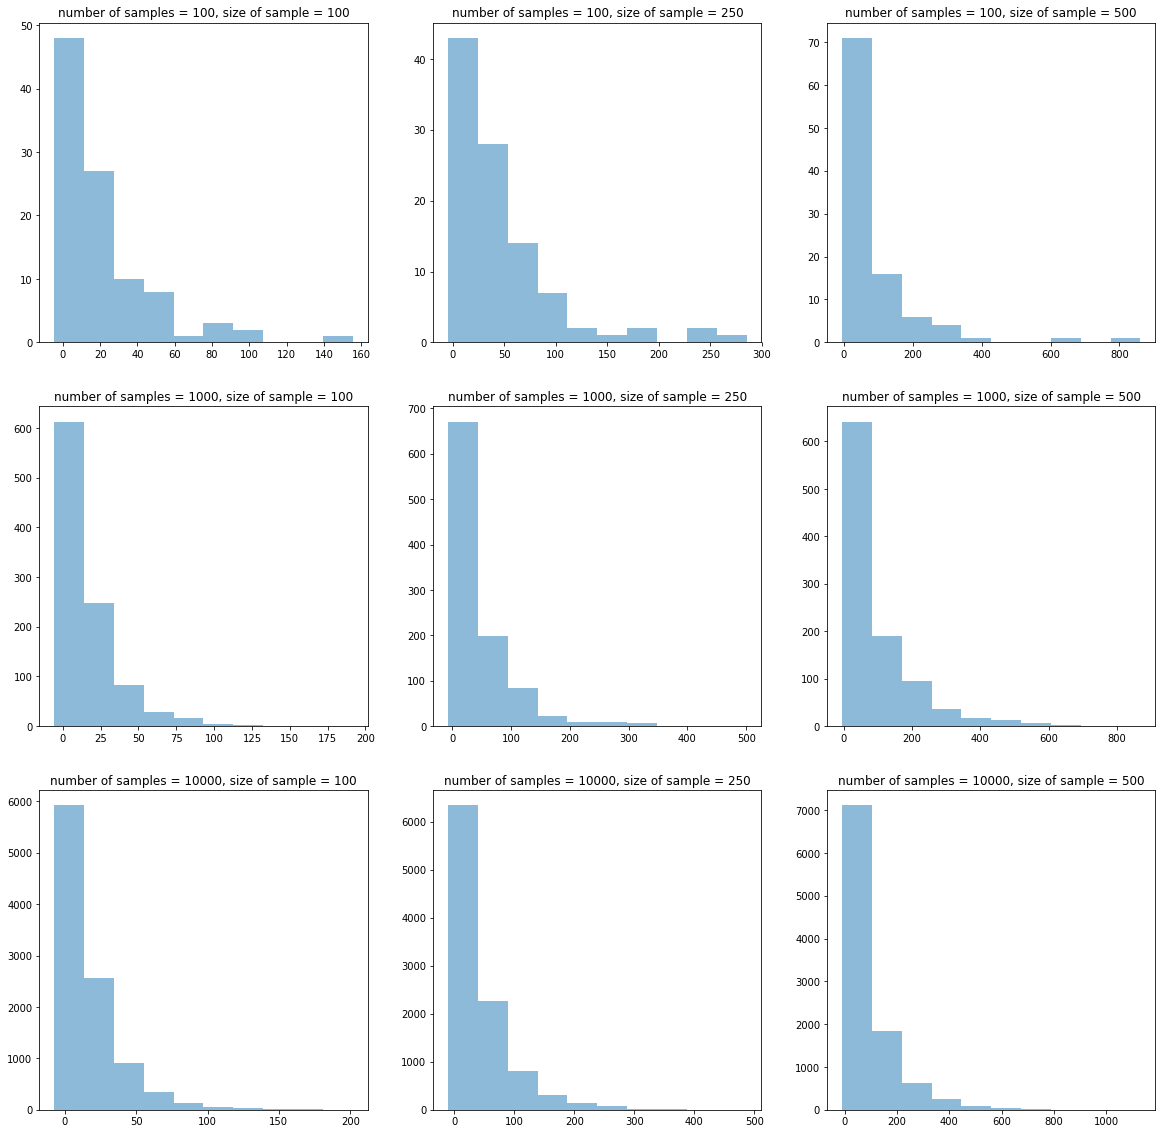

In [35]:
plt.figure(figsize=(20,20))
plt.title("distribution for log of criteria")
for i in range(3):
    for j in range(3):
        plt.subplot(3,3,3*j + i + 1)
        criteria_samples = create_criteria_samples(N[i], size = 100 * 10**j)
        plt.hist(criteria_samples, alpha = 0.5)
        plt.title("number of samples = %d, size of sample = %d" % (100 * 10**j,N[i]))
plt.show()

In [ ]:
for i in range(3):
    criteria_samples = create_criteria_samples(N[i], size = 10**5)
    for j in range(3):
        quantile = sps.mstats.mquantiles(criteria_samples,1 - Alp[j])
        print('Критерий: {K(X) >= %.2f}' % quantile)

Критерий: {K(X) >= 106.19}
Критерий: {K(X) >= 62.18}
Критерий: {K(X) >= 44.89}
Критерий: {K(X) >= 258.36}
Критерий: {K(X) >= 151.97}
Критерий: {K(X) >= 108.86}


$\sqrt n\bar{X} \sim N(\sqrt{n} \theta, 1)$. 

Пусть S - рнмк.

$ B = (X_1, ..., X_n: \sqrt n\bar{X} > z_{1-a}$ — квантиль распределения N(0, 1)).

Рассмотрим два случая: $S \cap B $ не плотно в B или плотно. 

В первом случае: посмотрим на  $ {X_1, ..., X_n :\sqrt n\bar{X} \in (S без B)} =: L. $ 

Зафиксируем e>0. 

Возьмем тета настолько большим, чтобы P_theta(L) < e.

Положим $L_2: ={X_1, ..., X_n : \sqrt n\bar{X} \in (S \cap B)}.$ Заметим, что поскольку S не плотно в B, то существует некоторый отрезок (a,b) содержащийся в $(z_{1-alpha})$, 

но не содержащийся в $ {\sqrt n\bar{X}: (X_1, ..., X_n) \in S}$. 

Поэтому $P_\theta(L_2)$ строго $< P_\theta(B)$. Пусть $P_\theta(L_2) + e/2 = P_\theta(B)$. Тогда $P_{\theta}(S) = P_{\theta}(L) + P_{\theta}(L_2) < P_{\theta}(B)$. Противоречие. 


Второй случай рассматривается аналогично, заменой B на (-inf; z_alpha) и стремление theta к -inf
это вторая задача